# Esercitazione del 9 gennaio 2025
## Compito di prova

Questo notebook include sia funzioni che test con il framework pytest. Per poter effettuare i test nel notebook, è necessario installare la libreria `ipytest`, con il comando:
```console
pip3 install ipytest
```
dalla riga di comando del vostro sistema operativo. Dopo di ché, è importante eseguire la cella qui sotto, prima di provare ad eseguire le celle con i test.

In [1]:
import ipytest
ipytest.autoconfig()

Ad ogni modo, qui utilizzo `ipytest` perché per comodità voglio fare tutto in un notebook, ma per lo svolgiento degli esercizi non dovete usare i notebook ma normali file Python.

### Esercizio 1 (7 punti)

Scrivere un programma che prende in input un numero intero $n$ e, utilizzando la libreria `ezgraphics` disegna una scala composta da $n$ gradini. Ad esempio, questo è il possibile output del programma per $n = 5$:

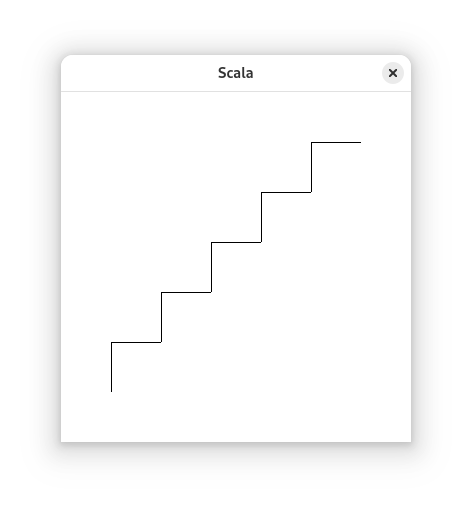

Il programma deve rispettare questi requisiti:
 * La dimensione (larghezza ed altezza) dei gradini della scala è di 50 pixel.
 * La finestra grafica dovrà avere dimensioni variabili a seconda del numero di gradini della scala, in modo da contenerla tutta.
 * La scala deve essere centrata nella finestra grafica.

#### Soluzione

Il seguente schizzo mostra le dimensioni della scala e della finestra che la contiene.

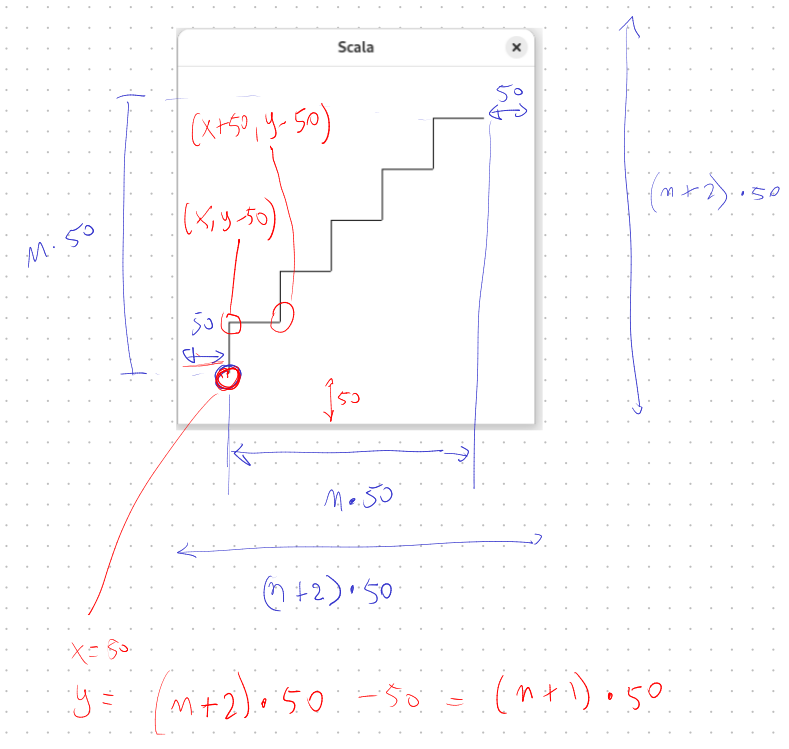

Lo schizzo è stato usato per determinare tutte le coordinate nel programma qui sottro. Per maggiore generalità, abbiamo reso tutto parametrico rispetto alla dimensione del gradino, contenuta nella costante `SIZE`.

In [2]:
from ezgraphics import GraphicsWindow

SIZE = 50  # dimensone dei gradini

n = int(input("Immeti numero gradini: "))

# Crea finestra grafica
win = GraphicsWindow((n+2)*SIZE, (n+2)*SIZE)
win.setTitle("Scala")
canvas = win.canvas()

# Punto iniziale in basso a sinistra dal quale partire
x = SIZE
y = (n+1)*SIZE

for _ in range(n):
    # Disegno un gradino
    canvas.drawLine(x, y, x, y - SIZE)
    canvas.drawLine(x, y - SIZE, x + SIZE, y - SIZE)
    # Aggiorno il punto di partenza
    x += SIZE
    y -= SIZE

win.wait()


### Esercizio 2

Scrivere una funzione `sottostringa(s1, s2)` che prende come parametri due stringhe e restituisce un booleano. La funzione deve restituire `True` se `s1` è una sottostringa di `s2`, ottenuta cioè scegliendo, in ordine e senza ripetizioni, alcuni caratteri di `s2`. Ad esempio, se la prima stringa è `"ciao"` e la seconda è `"ci23aa4o"` la funzione restituirà `True`. Se invece la seconda stringa è `"o2xcyia"`, la funzione restituirà `False`.
False.

#### Soluzione

In [3]:
def ricerca(s, c, n):
    """
    Cerca la lettera c nella stringa s a partire dalla posizione n.
    Restituisce la posizione della lettera c se la trova, -1 altrimenti.
    """
    for i in range(n, len(s)):
        if s[i] == c:
            return i
    return -1

def sottostringa(s1, s2):
    """
    Restituisce True se s1 è una sottostringa di s2, altrimenti restituisce False.
    """
    i = 0   # la posizione corrente nella stringa s2
    for c in s1:
        # cerca in che posizione si trova c nella stringa s2, ma non in tutta la stringa,
        # solo dalla posizione i in poi.
        j = ricerca(s2, c, i)
        if j == -1:
            # se non ho trovato c, restituisco False
            return False
        else:
            # se ho trovato c, continuo il ciclo, ma prima aggiorno l'indice i
            i = j + 1
    return True

Facciamo un paio di esperimenti:

In [4]:
# Dovrebbe restituire True
sottostringa("isno", "ciao sono io")

True

In [5]:
# Dovrebbe restituire False
sottostringa("caas", "ciao sono io")

False

### Esercizio 3



Scrivere alcuni test con il framework `pytest` per la funzione sottostringa dell’esercizio precedente.

Si considerino i seguenti casi:
  * gli esempi dell’esercizio 5;
  * almeno due esempi per cui s1 è vuota;
  * almeno due esempi per cui s2 è vuota;
  * almeno un esempio in cui s1 ed s2 sono uguali.

#### Soluzione

In [6]:
%%ipytest

def test_esempi():
    assert sottostringa("ciao", "ci23aa4o") == True
    assert sottostringa("ciao", "o2xcyia") == False

def test_s1_vuota():
    # la stringa vuota è una sottostringa di qualunque cosa, ottenuta non selezionando alcun
    # carattere
    assert sottostringa("", "pippo") == True
    assert sottostringa("", "pluto") == True

def test_s2_vuota():
    assert sottostringa("pippo", "") == False
    assert sottostringa("", "") == True

def test_uguali():
    # ogni stringa è una sottostringa di se stessa, ottenuta selezionando tutti i caratteri.
    assert sottostringa("pippo", "pippo") == True

....                                                                                         [100%]
4 passed in 0.01s


Notare che poiché il risultato di `sottostringa` è già un booleano, è preferibile rimuovere l'inutile confronto con `True` e trasformare il confronto con `False` in un `not`, come segue:

In [7]:
%%ipytest

def test_esempi():
    assert sottostringa("ciao", "ci23aa4o")
    assert not sottostringa("ciao", "o2xcyia")

def test_s1_vuota():
    assert sottostringa("", "pippo")
    assert sottostringa("", "pluto")

def test_s2_vuota():
    assert not sottostringa("pippo", "")
    assert sottostringa("", "")

def test_uguali():
    assert sottostringa("pippo", "pippo")

....                                                                                         [100%]
4 passed in 0.01s


### Esercizio 4

Scrivere una funzione che prende come parametri due stringhe `s1` ed `s2` e restituisce una nuova stringa ottenuta alternando un carattere da `s1` e uno da `s2`. Se una delle due stringhe e più corta dell’altra, la parte in eccesso della stringa più lunga viene aggiunta al risultato. Ad esempio, se `s1 = "ciao"` e `s2 = "12345678"`, la funzione  estituirà la stringa `"c1i2a3o45678"`.

#### Soluzione

Possiamo dividere il programma in due parti: nella prima parte, tramite un indice, scandiamo tutte le posizioni in cui sono presenti caratteri sia in `s1` che in `s2`. Queste sono le posizioni da 0 fino alla minima della lunghezza di `s1` ed `s2`. Utilizziamo al solito una variabile stringa `res` che inizializziamo con la stringa vuota  e alla quale aggiungiamo i caratteri di `s1` ed `s2` in maniera alternata. Nella seconda parte della funzione, aggiungiamo a `res` la parte che avanza da `s1` o da `s2`, a seconda di quale è la più lunga.

Ad esempio, se `s1 = "ciao"` and `s2 = "12345678"` il minimo delle due lunghezze è 4. Alternado tra `s1` ed `s2` nelle prime 4 posizioni (ovvero da 0 a 3), in `res` metteremo la stringa `"c1i2a3o4"`. A questo punto rimane da copiare la parte rimanente di `s2` in `res`. Ma qual è la parte rimanente di `s2` ? Proprio quella formata dalla posizione 4 poi, ovvero `s2[4:]`. In generale, nel programma, abbiamo la variabile `l` invece di 4. 

In [8]:
def alterna(s1, s2):
    res = ""
    # calcolo la lunghezza minima tra le due stringhe
    l = min(len(s1), len(s2))
    # prima parte: aggiungo a res alternativamente un elemento di s1 e di s2
    for i in range(l):
        res += s1[i]
        res += s2[i]
    # seconda parte: aggiungo a res il rimanente della stringa più lunga
    if len(s1) > len(s2):
        res += s1[l:]
    else:
        res += s2[l:]
    return res

In [9]:
alterna("ciao", "12345678")

'c1i2a3o45678'

Notare che non stiamo esplicitamente considerando il caso in cui `s1` ed `s2` hanno la stessa lunghezza. Il programma funziona comunque anche in questo caso: nell'if verrebbe scelto il ramo else, ma se le due stringhe hanno la stessa lunghezza allora `l` è uguale alla lunghezza di `s2`, ed `s2[l:]` è la stringa vuota.

Ovviamente, come per tutti gli esercizi, è possibile trovare soluzioni alternative. In questo esercizio, un modo alternativo è determinare per prima cosa qual è la stringa più lunga ed eseguira due serie di istruzioni differenti nei due casi. Ovviamente, la soluzione è meno elegante a causa della duplicazione del codice (e, a seconda di come la penso al momento, potrebbe costarvi qualche decimo di punto). Comunque, questa è la soluzione con questo approccio alternativo.

In [10]:
def alterna2(s1, s2):
    res = ""
    if len(s1) > len(s2):
        for i in range(len(s2)):
            res += s1[i]
            res += s2[i]
        res += s1[len(s2):]
    else:
        for i in range(len(s1)):
            res += s1[i]
            res += s2[i]
        res += s2[len(s1):]
    return res

In [11]:
alterna2("ciao", "12345678")

'c1i2a3o45678'

### Esercizio 5

Si consideri la seguente funzione in Python che, presa una lista in input, restituisce la stessa lista in ordine inverso.
```python
def inverti(l):
    res = []
    for v in l:
        res = [v] + res
    return res
```
Tenendo conto che l’operazione di concatenazione tra liste ha complessità pari a $O(l_1 + l_2)$, dove $l_1$ ed $l_2$ sono le lunghezze delle due liste da concatenare, determinare la complessità computazionale della funzione di cui sopra.

#### Soluzione

Indichiamo con $n$ la dimensione del nostro input, ovvero la lunghezza della lista `l`. Esaminiamo ogni riga di codice della funzione, cercando di capire quanto tempo prende la sua esecuzione, e quanto volte la eseguiamo.

  1. L'istruzione `res = []` è una operazione elementare, come tale ha complessità $O(1)$. Viede eseguita una sola volta, per un totale di $O(1)$.
  2. Stessa cosa vale per l'istruzione `return res`.
  3. L'istruzione `for v in l` (e con ciò intendo solo l'operazione di estrazione di un elemento da `l`, non il corpo) avviene in tempo $O(1)$, ma viene eseguita per `len(l)` volte, ovvero $n$ volte, per cui otteniamo in totale $O(n)$.
  4. Infine, l'istruzione `res = [v] + res` viene eseguita anch'essa $n$ volte, ma il tempo di esecuzione non è costante, perché dipende dalla lunghezza delle stringhe che concateno. 

Per risolvere i problemi con l'istruzione `res = [v] + res`, possiamo procedere in due modi, uno più grossolano, uno più preciso.

##### Procedimento grossolano

Siccome la complessità computazionale come la calcoliamo noi è una stima per eccesso del tempo di esecuzione ($O(n)$ vuol dire una funzione che ha ordine di grandezza uguale ad $n$ **o inferiore**), possiamo scegliere di considerare come costo fisso dell'istruzione `res = [v] + res` il suo costo massimo, che si ha all'ultima iterazione quando la lunghezza di `res` è $n-1$. In tal caso, poiché la lista `[v]` ha sempre lunghezza 1, il costo dell'operazione è $O(1 + n-1)=O(n)$. Visto che viene eseguita $n$ volte, il costo totale è $O(n) \cdot n = O(n^2)$.

A questo punto, la complessità computazionale di `inverti` è la somma del tempo totale impiegato dalle singole istruzioni, quindi:
$$O(1) + O(1) + O(n) + O(n^2) = O(n^2)$$
perché vi ricordo che la somma di un numero *costante* di ordini di grandezza si può semplicemente prendere l'ordine di grandezza più alto.

**Nel compito siete autorizzati ad usare questo tipo di procedimento senza ripercussioni sul punteggio finale.**

#### Procedimento raffinato

Procedendo come abbiamo fatto sopra di sicuro non sbagliamo, ma il risultato potrebbe essere più grande di quanto effettivamente necessario. Magari si può dimostrare che la complessità di questa funzione non è $O(n^2)$ ma $O(n^{1.5})$ o anche $O(n)$ ? Quindi, sebbene non sia necessario per il compito, voglio farvi vedere come si svolge una analisi più accurata.

Se non vogliamo approssimare il costo di `res = [v] + res` con $O(n)$, allora non ci resta che sommare il costo di ogni iterazione.
  
  1. La prima volta che l'istruzione viene eseguita, `res` è vuota, per cui il tempo di esecuzione è $O(1 + 0)=O(1)$.
  2. La seconda volta che l'istruzione viene eseguita, `res` avrà lunghezza 1, per cui il tempo di esecuzione è $O(1 + 1)= O(2)$ (che poi $O(2)$ è uguale ad $O(1)$, ma per ora lasciamola così).
  3. Le volte successive il costo sarà $O(3)$, $O(4)$, etc... fino ad $O(n)$.

Possiamo sommare questi costi ottenendo:

$$O(1) + O(2) + \cdots + O(n)$$

Essendo il numero di addendi non costante, ma dipendente da $n$, non possiamo semplicemente scegliere il termine maggiore, ma dobbiamo effettuare veramente la somma, ottenendo:

$$O(1 + 2  + 3 + \cdots + n)$$

Poiché la somma dei numeri da $1$ fino ad $n$ è $\frac{n(n+1)}{2}$, otteniamo

$$O(1) + O(2) + \cdots + O(n) = O\left(\frac{n(n+1)}{2}\right) = O\left(\frac{n^2}{2} + \frac{n}{2}\right) = O\left(\frac{n^2}{2}\right) = O(n^2)$$

Quindi, anche con questa analisi più accurata, il costo dell'istruzione `res = [v] + res` è $O(n^2)$.

### Esercizio 6

Eseguire passo-passo il seguente codice Python, utilizzando l’apposito modulo:

In [ ]:
def dup(l):
    res = []
    for v in l:
        res.append(v)
        res.append(v)
    return res

l1 = [ [0], [1,2] ]
l2 = dup(l1)
l1[1][1] = "a"
print(l2)

Descrivere lo stato della memoria (heap e stack) alla fine dell’esecuzione del programma.

#### Soluzione

Questa è l'esecuzione passo-passo:

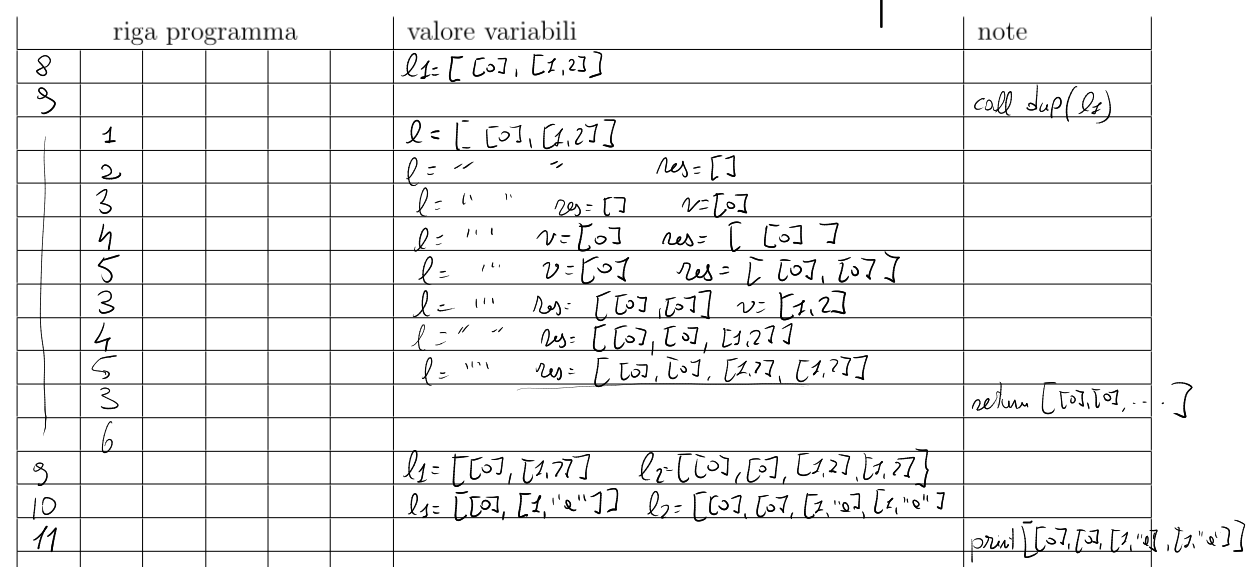

Notare che alla riga 9, l'istruziome `l[1][1] = "a"` sostituisce il valore `2` presente nella lista `l1` con la stringa `"a"`. Inoltre, a causa dell'aliasing presente tra `l1` ed `l2`, anche i `2` presenti nella lista `l2` sono rimpiazzati da `"a"`. Ma l'aliasing non è visibile nello schema semplificato del modulo che usiamo per l'esecuzione passo passo, per tenerne traccia bisogna usare uno schema più accurato che tiene traccia di ciò che avviene nello stack e nello heap.  La situazione finale di stack ed heap, in particolare, è questa:

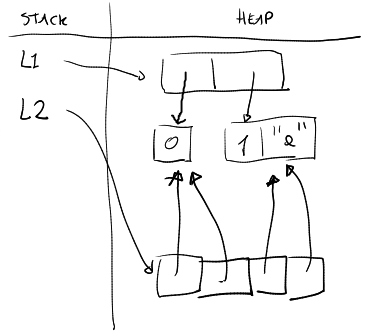

In questo disegno, per semplicità, abbiamo inserito i valori degli oggetti **immutabili** direttamente dentro le liste, invece che metterli a parte ed inserire nelle liste una freccia che punta verso di loro.